In [146]:
import pandas as pd
import matplotlib.pyplot as plt

pumpkins = pd.read_csv("../data/US-pumpkins.csv")
for column in pumpkins.columns:
    print(f"{column} - null value number: {pumpkins[column].isnull().sum()}")
print(pumpkins.shape)

City Name - null value number: 0
Type - null value number: 1712
Package - null value number: 0
Variety - null value number: 5
Sub Variety - null value number: 1461
Grade - null value number: 1757
Date - null value number: 0
Low Price - null value number: 0
High Price - null value number: 0
Mostly Low - null value number: 103
Mostly High - null value number: 103
Origin - null value number: 3
Origin District - null value number: 1626
Item Size - null value number: 279
Color - null value number: 616
Environment - null value number: 1757
Unit of Sale - null value number: 1595
Quality - null value number: 1757
Condition - null value number: 1757
Appearance - null value number: 1757
Storage - null value number: 1757
Crop - null value number: 1757
Repack - null value number: 0
Trans Mode - null value number: 1757
Unnamed: 24 - null value number: 1757
Unnamed: 25 - null value number: 1654
(1757, 26)


In [147]:
new_pumpkins = pd.DataFrame({
    'Date': pd.DatetimeIndex(pumpkins["Date"]),
    'Month': pd.DatetimeIndex(pumpkins["Date"]).month,
    'Package': pumpkins['Package'],
    'Low Price': pumpkins['Low Price'],
    'High Price': pumpkins['High Price'],
    'Price': (pumpkins['Low Price'] + pumpkins['High Price']) / 2
})
new_pumpkins = new_pumpkins[new_pumpkins['Package'].str.contains("bushel")]
new_pumpkins.loc[new_pumpkins['Package'].str.contains("1 1/9"), 'Price'] = new_pumpkins['Price'] * (1 + 1 / 9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains("1/2"), 'Price'] = new_pumpkins['Price'] * 2


In [148]:
print(new_pumpkins.groupby("Package").head(5))

           Date  Month               Package  Low Price  High Price      Price
70   2016-09-24      9  1 1/9 bushel cartons       15.0        15.0  16.666667
71   2016-09-24      9  1 1/9 bushel cartons       18.0        18.0  20.000000
72   2016-10-01     10  1 1/9 bushel cartons       18.0        18.0  20.000000
73   2016-10-01     10  1 1/9 bushel cartons       17.0        17.0  18.888889
74   2016-10-08     10  1 1/9 bushel cartons       15.0        15.0  16.666667
123  2016-09-24      9    1/2 bushel cartons       18.0        18.0  36.000000
124  2016-09-24      9    1/2 bushel cartons       15.0        15.0  30.000000
125  2016-10-01     10    1/2 bushel cartons       18.0        18.0  36.000000
126  2016-10-01     10    1/2 bushel cartons       15.0        15.0  30.000000
127  2016-10-01     10    1/2 bushel cartons       17.0        17.0  34.000000
377  2016-09-24      9   1 1/9 bushel crates       15.0        16.0  17.222222
378  2016-10-01     10   1 1/9 bushel crates       1

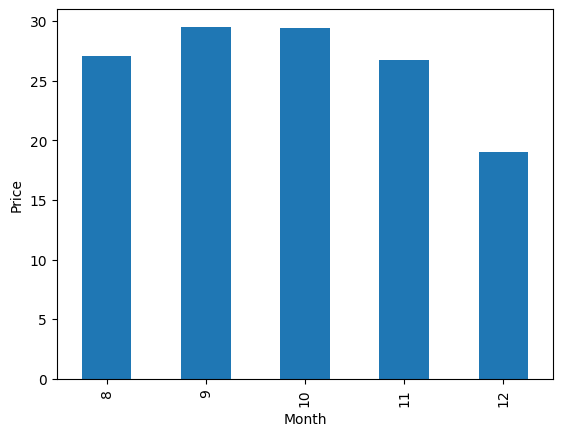

In [149]:

new_pumpkins.groupby('Month')['Price'].mean().plot(kind='bar')
plt.ylabel("Price")
# fig,ax = plt.subplots()
# ax.scatter(new_pumpkins['Month'], new_pumpkins['Low Price'])
# ax.set_title("test1")
# fig,ax = plt.subplots()
# ax.scatter(new_pumpkins['Month'], new_pumpkins['Price'])
# ax.set_title("test2")
plt.show()

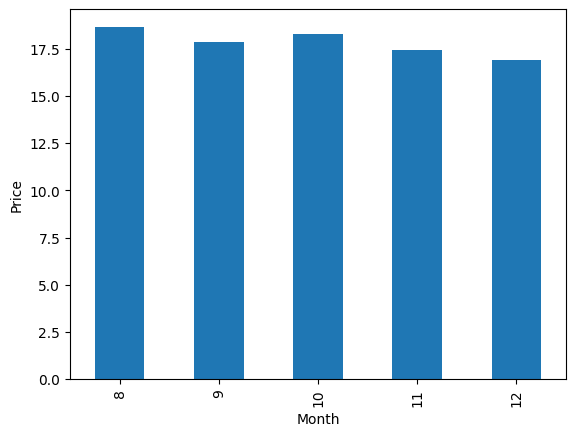

In [150]:

new_pumpkins.groupby('Month')['Low Price'].mean().plot(kind='bar')
plt.ylabel("Price")
plt.show()